Name: Perez, Cris John M.<br>
Course and Section: CPE 019 - CPE32S9<br>
Date of Submission: April 19, 2024<br>
Instructor: Engr. Roman Richard<br>

# Assignment 8.1: Saving Models

#### Instructions:

1. Choose any dataset applicable to either a classification problem or a regression problem.
2. Explain your datasets and the problem being addressed.
3. Show evidence that you can do the following:
* Save a model in HDF5 format
* Save a model and load the model in a JSON format
* Save a model and load the model in a YAML format
* Checkpoint Neural Network Model Improvements
* Checkpoint Best Neural Network Model only
* Load a saved Neural Network model
* Visualize Model Training History in Keras
* Show the application of Dropout Regularization
* Show the application of Dropout on the visible layer
* Show the application of Dropout on the hidden layer
* Show the application of a time-based learning rate schedule
* Show the application of a drop-based learning rate schedule
4. Submit the link to your Google Colab (make sure that it is accessible to me)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install h5py

In [ ]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iranian_churn = fetch_ucirepo(id=563)

# data (as pandas dataframes)
X = iranian_churn.data.features
y = iranian_churn.data.targets

# metadata
print(iranian_churn.metadata)

# variable information
print(iranian_churn.variables)

{'uci_id': 563, 'name': 'Iranian Churn', 'repository_url': 'https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/563/data.csv', 'abstract': "This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.", 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 3150, 'num_features': 13, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Churn'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5JW3Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attribu

In [7]:
import pandas as pd
data = pd.concat([X, y], axis=1, join='inner')
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.

## 1. Save a model in HDF5 format
## 2. Save a model and load the model in a JSON format

In [ ]:
# MLP for JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values

# create model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_data, Y_data, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X_data, Y_data, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/CPE019/Finals/Assign8p1/model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CPE019/Finals/Assign8p1/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_data, Y_data, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 90.25%
Saved model to disk
Loaded model from disk
accuracy: 90.25%


## 3. Save a model and load the model in a YAML format

In [ ]:
# MLP for Pima Indians Dataset serialize to YAML and HDF5
from tensorflow.keras.models import Sequential, model_from_yaml
from tensorflow.keras.layers import Dense
import numpy
import os
# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values
# create model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_data, Y_data, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X_data, Y_data, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/CPE019/Finals/Assign8p1/model_yaml.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CPE019/Finals/Assign8p1/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_data, Y_data, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 91.62%
Saved model to disk
Loaded model from disk
accuracy: 91.62%


## 4. Checkpoint Neural Network Model Improvements

In [ ]:
#Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values
# create model
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="/content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_data, Y_data, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.75865, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-01-0.76.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.75865

Epoch 3: val_accuracy improved from 0.75865 to 0.82115, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-03-0.82.hdf5

Epoch 4: val_accuracy improved from 0.82115 to 0.82308, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-04-0.82.hdf5

Epoch 5: val_accuracy did not improve from 0.82308

Epoch 6: val_accuracy improved from 0.82308 to 0.85385, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-06-0.85.hdf5

Epoch 7: val_accuracy did not improve from 0.85385

Epoch 8: val_accuracy did not improve from 0.85385

Epoch 9: val_accuracy did not improve from 0.85385

Epoch 10: val_accuracy did not improve from 0.85385

Epoch 11: val_accuracy did not improve from 0.85385

Epoch 12: val_accuracy improved from 0.85385 to 0.86250, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights-improvement-12-0.86.hdf5

Epoch 13: val_accura

## 5. Checkpoint Best Neural Network Model only

In [ ]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values
# create model
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="/content/drive/MyDrive/CPE019/Finals/Assign8p1/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X_data, Y_data, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.86154, saving model to /content/drive/MyDrive/CPE019/Finals/Assign8p1/weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.86154

Epoch 3: val_accuracy did not improve from 0.86154

Epoch 4: val_accuracy did not improve from 0.86154

Epoch 5: val_accuracy did not improve from 0.86154

Epoch 6: val_accuracy did not improve from 0.86154

Epoch 7: val_accuracy did not improve from 0.86154

Epoch 8: val_accuracy did not improve from 0.86154

Epoch 9: val_accuracy did not improve from 0.86154

Epoch 10: val_accuracy did not improve from 0.86154

Epoch 11: val_accuracy did not improve from 0.86154

Epoch 12: val_accuracy did not improve from 0.86154

Epoch 13: val_accuracy did not improve from 0.86154

Epoch 14: val_accuracy did not improve from 0.86154

Epoch 15: val_accuracy did not improve from 0.86154

Epoch 16: val_accuracy did not improve from 0.86154

Epoch 17: val_accuracy did not improve from 0.86154

Epoch 18: val_accuracy d

## 6. Load a saved Neural Network model

In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# load weights
model.load_weights("/content/drive/MyDrive/CPE019/Finals/Assign8p1/weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X_data, Y_data, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 92.41%


## 7.Visualize Model Training History in Keras

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


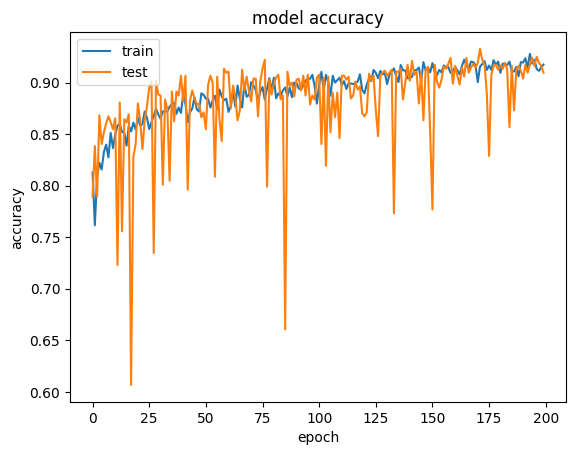

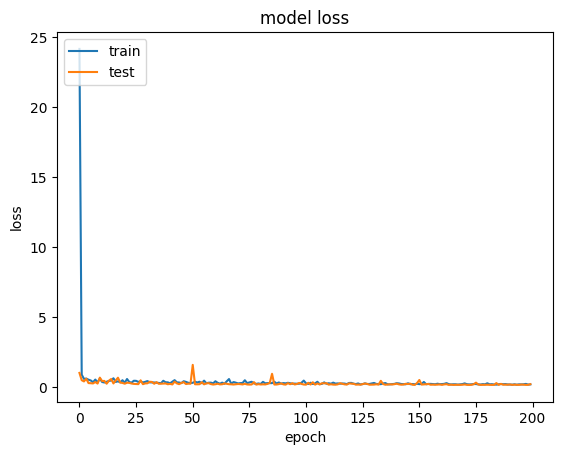

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# split into input (X) and output (Y) variables
X_data = data.iloc[:,0:13].values
Y_data = data.iloc[:,13].values
# create model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_data, Y_data, validation_split=0.33, epochs=200, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Show the application of Dropout Regularization

In [ ]:
pip install scikeras

In [ ]:
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load dataset
dataframe = read_csv("/content/drive/MyDrive/CPE019/Finals/Assign8p1/Customer Churn.csv", header=None, sep=',')
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:13]
Y = dataset[:, 13]

# Apply label encoding to categorical columns
label_encoders = []
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):  # Check if the first element of the column is a string
        label_encoder = LabelEncoder()
        X[:, i] = label_encoder.fit_transform(X[:, i])
        label_encoders.append(label_encoder)

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Define baseline model
def create_baseline():
    model = Sequential()
    model.add(Dense(12, input_shape=(13,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Define pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Define cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Evaluate pipeline
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## 9. Show the application of Dropout on the visible layer

In [1]:
pip install tensorflow

In [ ]:
# Example of Dropout on the Sonar Dataset: Visible Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("/content/drive/MyDrive/CPE019/Finals/Assign8p1/Customer Churn.csv", header=None, sep=',')
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(13,)))
	model.add(Dense(12, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## 10. Show the application of Dropout on the hidden layer

In [ ]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("/content/drive/MyDrive/CPE019/Finals/Assign8p1/Customer Churn.csv", header=None, sep=',')
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13].astype(float)
Y = dataset[:,13]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(13,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## 11. Show the application of a time-based learning rate schedule

In [ ]:
# Time Based Learning Rate Decay
import tensorflow
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# tf.keras.optimizers.legacy.SGD
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.optimizers.legacy import SGD
from sklearn.preprocessing import LabelEncoder
# load dataset
dataframe = data.values
# split into input (X) and output (Y) variables
X = dataframe[:,0:13].astype(float)
Y = dataframe[:,13].astype(int)

# create model
model = Sequential()
model.add(Dense(12, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.25, epochs=epochs, batch_size=20, verbose=2)

## 12. Show the application of a drop-based learning rate schedule

In [ ]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

# Conclusions and Lessons Learned

In this activity, we were tasked to choose a dataset that is applicable to either a classification or regression and to show evidences on applying different saving models in deep learning. I failed to implement tasks 8-12 because of constant errors that I can't find solution. Nevertheless, I was able to implement tasks 1-7. I learned from this activity that deep learning also requires deep understanding because I find it hard to learn on my own.

Dataset used: Iranian Churn. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5JW3Z.